## CÓDIGO DEFINITIVO

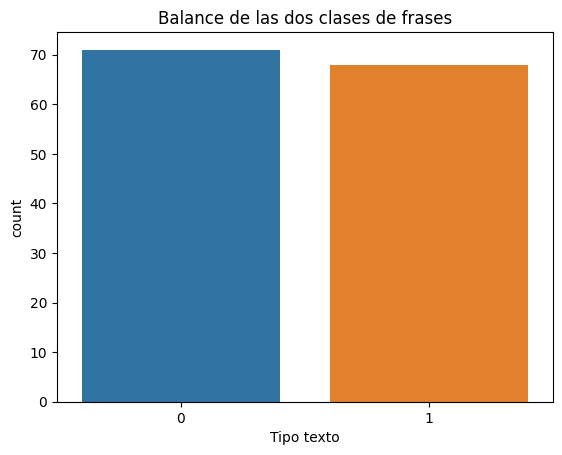

The GradientBoostingClassifier()  Accuracy  is 0.7619047619047619
              precision    recall  f1-score   support

           0       0.71      0.96      0.81        23
           1       0.91      0.53      0.67        19

    accuracy                           0.76        42
   macro avg       0.81      0.74      0.74        42
weighted avg       0.80      0.76      0.75        42



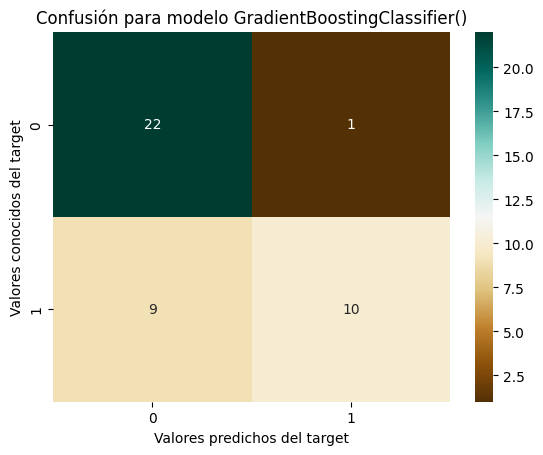

The GaussianNB()  Accuracy  is 0.8333333333333334
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        23
           1       0.75      0.95      0.84        19

    accuracy                           0.83        42
   macro avg       0.85      0.84      0.83        42
weighted avg       0.86      0.83      0.83        42



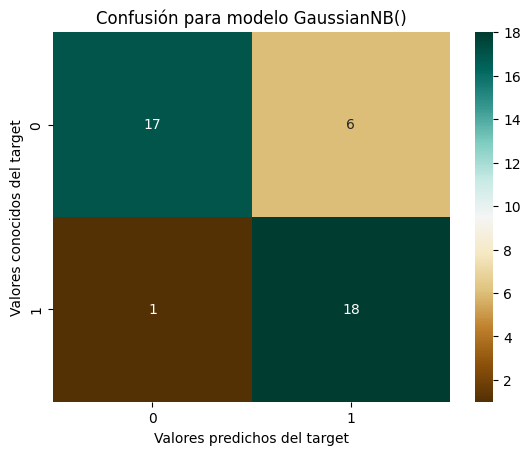

The HistGradientBoostingClassifier()  Accuracy  is 0.7142857142857143
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
           1       0.77      0.53      0.62        19

    accuracy                           0.71        42
   macro avg       0.73      0.70      0.70        42
weighted avg       0.73      0.71      0.70        42



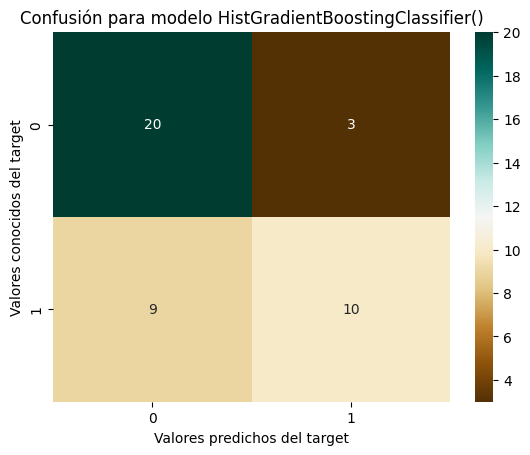

The RandomForestClassifier()  Accuracy  is 0.8333333333333334
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      0.63      0.77        19

    accuracy                           0.83        42
   macro avg       0.88      0.82      0.82        42
weighted avg       0.87      0.83      0.83        42



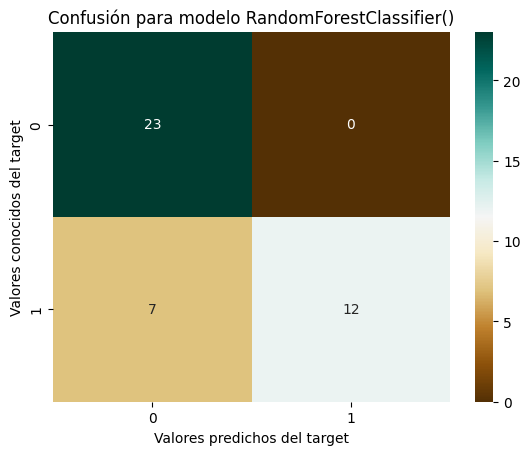

The LogisticRegression()  Accuracy  is 0.9047619047619048
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.94      0.84      0.89        19

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42



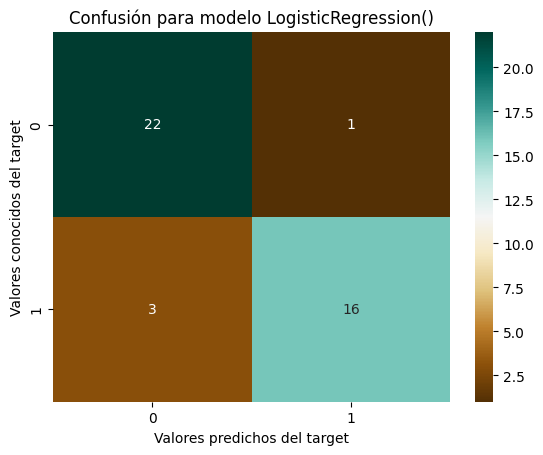

The XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)  Accuracy  is 0.7857142857142857
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        23
           1       1.00      0.53      0.69        19

    accuracy                           0.79    

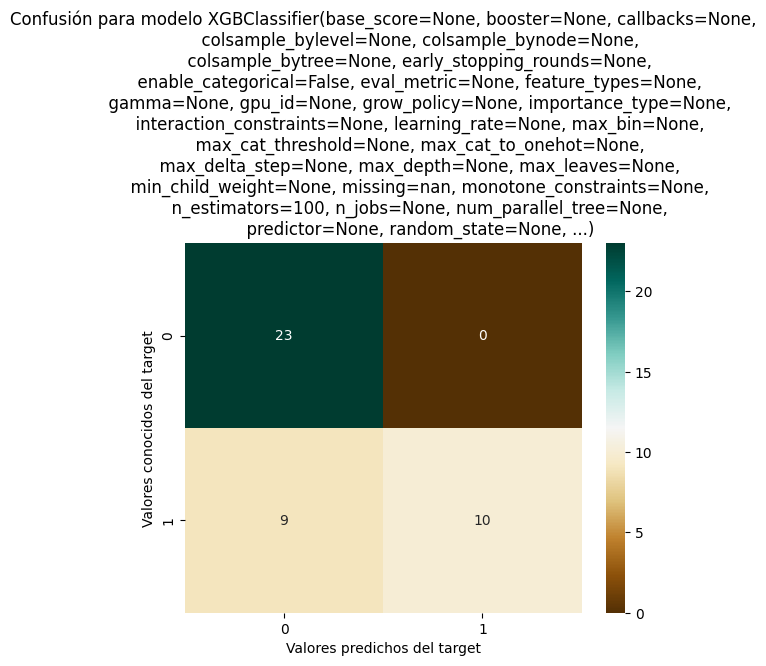

Epoch 1/50
4/4 [==============================] - 3s 222ms/step - loss: 0.6911 - accuracy: 0.5567 - val_loss: 0.6849 - val_accuracy: 0.6905
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 0.6816 - accuracy: 0.7320 - val_loss: 0.6823 - val_accuracy: 0.7381
Epoch 3/50
4/4 [==============================] - 0s 31ms/step - loss: 0.6737 - accuracy: 0.8351 - val_loss: 0.6796 - val_accuracy: 0.7381
Epoch 4/50
4/4 [==============================] - 0s 28ms/step - loss: 0.6656 - accuracy: 0.9175 - val_loss: 0.6769 - val_accuracy: 0.8095
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 0.6573 - accuracy: 0.9897 - val_loss: 0.6741 - val_accuracy: 0.8095
Epoch 6/50
4/4 [==============================] - 0s 30ms/step - loss: 0.6490 - accuracy: 1.0000 - val_loss: 0.6711 - val_accuracy: 0.8571
Epoch 7/50
4/4 [==============================] - 0s 28ms/step - loss: 0.6405 - accuracy: 1.0000 - val_loss: 0.6681 - val_accuracy: 0.8571
Epoch 8/50
4/4 [==========

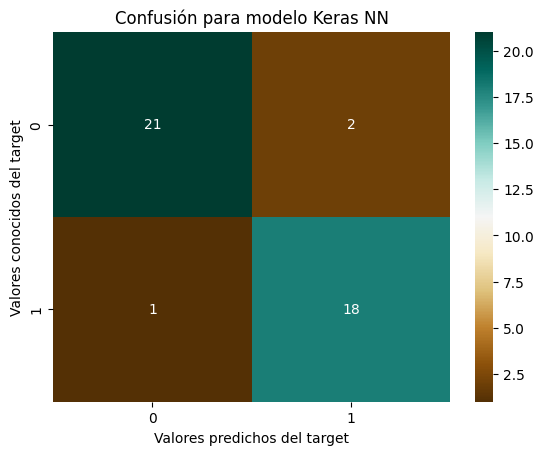

The Hybrid Model Accuracy  is 0.9047619047619048
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.94      0.84      0.89        19

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42



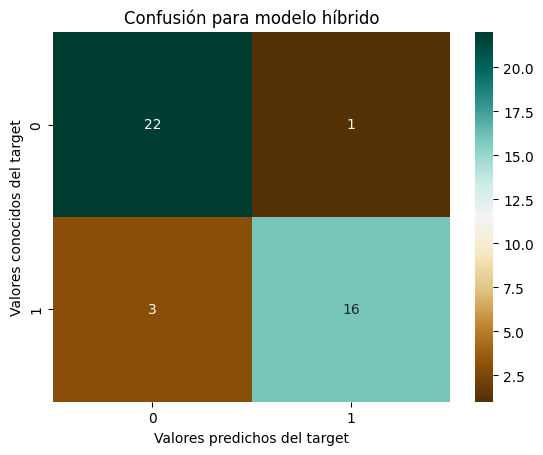

<module 'pipreqs' from 'C:\\Users\\ivanp\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pipreqs\\__init__.py'>

In [3]:
#PRIMERO, IMPORTO TODAS LAS LIBRERÍAS NECESARIAS

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

import string

import spacy
import spacy_spanish_lemmatizer ; nlp = spacy.load('es_core_news_sm') ; nlp.replace_pipe('lemmatizer', 'spanish_lemmatizer')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import xgboost
from xgboost import XGBClassifier

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

#CARGO EL DATASET CON LAS FRASES
df_raw = pd.read_excel(r'frases.xlsx')


#FUNCIONES USADAS:

def crear_target(df_raw): #Nos pone un 1 si la frase fue generada por una IA y un 0 si la generó un humano
    df = df_raw.copy() #Para no cambiar el dataset original
    df.loc[df['Tipo texto'] == 'Humano', 'Tipo texto'] = 0 ; df.loc[df['Tipo texto'] == 'IA', 'Tipo texto'] = 1
    return df

def lema_stopwords(frase): #Esta función toma una frase y le hace la primera parte del preprocesado: Quita palabras sin significado (stopwords)...
                           #... y transforma todas las palabras a su lematizado (ver PDF para mayor comprensión)
    stop_words_esp = set(stopwords.words('spanish'))
    frase_nueva = ''
    for j in nlp(frase):  #Comprueba que el lematizado no sea una de las stopwords y si es así la añade a la frase nueva):
        if str(j.lemma_) not in stop_words_esp:
            frase_nueva += str(j.lemma_) + ' '
    frase_nueva = frase_nueva.translate(str.maketrans('', '', string.punctuation)) #Quita los puntos, comas, etc.
    return frase_nueva

def prep_df_final(df): #Termina el preprocesado del dataset transformando todas las frases y haciendo la vectorización:
    df2 = df.copy()
    for i in range(len(df2)):
        df2.loc[i, 'Frases'] = lema_stopwords(df2.loc[i, 'Frases'])
    
    vect = TfidfVectorizer() ; frases = list(df2['Frases']) #Ahora vectorizo cada una de las frases

    count_matrix = vect.fit_transform(frases)
    count_array = count_matrix.toarray()
    df3 = pd.DataFrame(data=count_array,columns = vect.get_feature_names())
    df_final = pd.concat([df3, df2['Tipo texto']], axis=1)
    
    return df_final

def separ_train_test(df_final, tamano_test): #Básicamente es train_test_split de sklearn, pero lo hago como función para editar test_size
    X = df_final.iloc[:,:-1] ; y = df_final.iloc[:,-1].astype(int)
    X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = tamano_test)
    
    return X_train, X_test, y_train, y_test

def modelo_clasificacion(classifier, X_train, X_test, y_train, y_test): #Función que toma como input el modelo que queramos. Lo entrena y saca...
                                                                        #... los resultados obtenidos.
    classifier.fit(X_train,y_train) #Entrena al modelo
    
    pred = classifier.predict(X_test) 
    
    #Resultados que nos pueden interesar
    accuracy = accuracy_score(y_test,pred)
    print(f'The {classifier}  Accuracy  is {accuracy}' )
    tabla_resultados = classification_report(y_test, pred) ; print(tabla_resultados) #Muestra métricas como F1-score, recal...
        #Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, pred)
    sns.heatmap(matriz_confusion, annot = True, cmap="BrBG", fmt = 'g')
    plt.xlabel('Valores predichos del target') ; plt.ylabel('Valores conocidos del target') ; plt.title(f'Confusión para modelo {classifier}')
    plt.show()
    if accuracy >= 0.75: #Solo considero los modelos que tengan una precisión razonable, si es menor el modelo saca los rsultados pero no las pred
        return pred #Voy a usar esto para el modelo híbrido / democrático

    

#AHORA METEMOS LOS PRIMEROS MODELOS QUE QUEREMOS (la idea es mezclar todos para obtener un modelo híbrido):
    #Primero preparo todo siguiendo los pasos:
df = crear_target(df_raw) ; sns.countplot(data = df, x = 'Tipo texto') ; plt.title('Balance de las dos clases de frases') ; plt.show()
df_final = prep_df_final(df) ; X_train, X_test, y_train, y_test = separ_train_test(df_final, 0.3) #Tamaño arbitrario test

    #Meto los primeros algoritmos que no requieren de preparación previa y que puedo hacer usando un bucle
classifiers = [GradientBoostingClassifier(),GaussianNB(),HistGradientBoostingClassifier(), 
               RandomForestClassifier(),LogisticRegression(),XGBClassifier()]
predicciones = []
for i in classifiers:
    predicciones.append(modelo_clasificacion(i, X_train, X_test, y_train, y_test))

    
    
    #Creo una red neuronal secuencial sencilla como siguiente modelo para ver si mejora lo anterior
red_neuronal = tf.keras.models.Sequential()
red_neuronal.add(tf.keras.layers.Dense(units=4, activation='relu')) #Capa input
#red_neuronal.add(tf.keras.layers.Dense(units=2, activation='relu')) #Capa interna
red_neuronal.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Capa output. Función sigmoide como activación por la naturaleza del problema
red_neuronal.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
red_neuronal.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)
        #Aquí hay que tener en cuenta que los valores output de la red son probabilidades de que las frases sean 1. Tomo como umbral un 0.5
        # Esto significa que si P > 0.5, la red predice que la frase es un 1 (creada por IA) y viceversa.
keras_predict = red_neuronal.predict(X_test)
keras_predict = (keras_predict > 0.5)   # Umbral que comento
my_list = map(lambda x: x[0], keras_predict)
keras_predict = pd.Series(my_list) ; keras_predict = keras_predict.astype(int) #Lo que he explicado
        #Muestro mismo esquema de resultados que para los anteriores
print(f'The Keras NN  Accuracy  is {accuracy_score(y_test,keras_predict)}' )
tabla_resultados = classification_report(y_test, keras_predict) ; print(tabla_resultados) #Muestra métricas como F1-score, recal...
matriz_confusion = confusion_matrix(y_test, keras_predict) ; sns.heatmap(matriz_confusion, annot = True, cmap="BrBG", fmt = 'g')
plt.xlabel('Valores predichos del target') ; plt.ylabel('Valores conocidos del target') ; plt.title(f'Confusión para modelo Keras NN')
plt.show()

if accuracy_score(y_test,keras_predict) >= 0.75: #Mismo criterio de antes
    predicciones.append(keras_predict)
predicciones = [x for x in predicciones if x is not None] #Me quedo solo con las predicciones de los mejores.
                

                     
# AHORA MEZCLAMOS TODOS LOS RESULTADOS SIGUIENDO UN RAZONAMIENTO DEMOCRÁTICO:
prediccion_hibrido = []
for i in range(len(predicciones[0])): #Todos tienen la misma longitud:
    n_zeros, n_ones = 0,0
    for j in range(len(predicciones)):
        if predicciones[j][i] == 0:
            n_zeros += 1
        else:
            n_ones += 1
    if n_zeros > n_ones:
        prediccion_hibrido.append(0)
    else:
        prediccion_hibrido.append(1)

print(f'The Hybrid Model Accuracy  is {accuracy_score(y_test,prediccion_hibrido)}' )
tabla_resultados = classification_report(y_test, prediccion_hibrido) ; print(tabla_resultados) #Muestra métricas como F1-score, recal...
matriz_confusion = confusion_matrix(y_test, prediccion_hibrido) ; sns.heatmap(matriz_confusion, annot = True, cmap="BrBG", fmt = 'g')
plt.xlabel('Valores predichos del target') ; plt.ylabel('Valores conocidos del target') ; plt.title(f'Confusión para modelo híbrido')
plt.show()   